In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Each Member’s Optimum Model Results
data = {
    'Member': ['1', '2', '3', '4', '5'],
    'Model': ['LSTM', 'SVR', 'Random Forest', 'KNN', 'Decision Tree'],
    'RMSE_test': [0.014818, 0.012696, 0.010209, 0.051599, 0.012301],
    'MAE_test': [0.010035, 0.008211, 0.005457, 0.032965, 0.006804],
    'R2_test': [0.996950, 0.997745	, 0.998542, 0.962756, 0.997883],
    'Training_Time_sec': [27.206859, 38.871875, 30.410619, 0.158858, 0.533744],
}
df = pd.DataFrame(data)
df


,Member,Model,RMSE_test,MAE_test,R2_test,Training_Time_sec
0,1,LSTM,0.014818,0.010035,0.996950,27.206859
1,2,SVR,0.012696,0.008211,0.997745,38.871875
2,3,Random Forest,0.010209,0.005457,0.998542,30.410619
3,4,KNN,0.051599,0.032965,0.962756,0.158858
4,5,Decision Tree,0.012301,0.006804,0.997883,0.533744


,Member,Model,RMSE_test,MAE_test,R2_test,Training_Time_sec
2,3,Random Forest,0.010209,0.005457,0.998542,30.410619
4,5,Decision Tree,0.012301,0.006804,0.997883,0.533744
1,2,SVR,0.012696,0.008211,0.997745,38.871875
0,1,LSTM,0.014818,0.010035,0.996950,27.206859
3,4,KNN,0.051599,0.032965,0.962756,0.158858


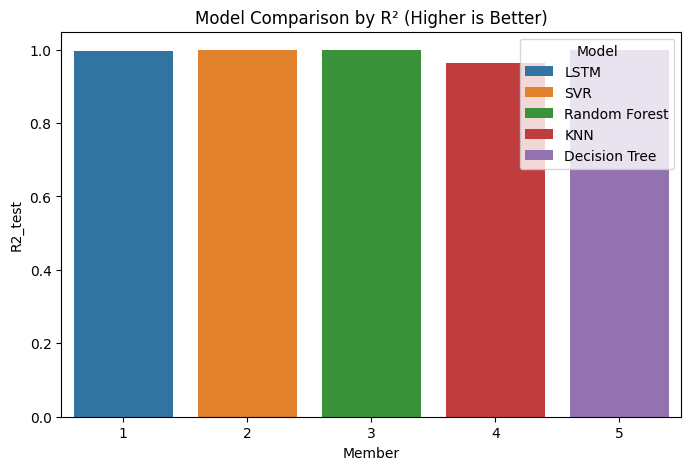

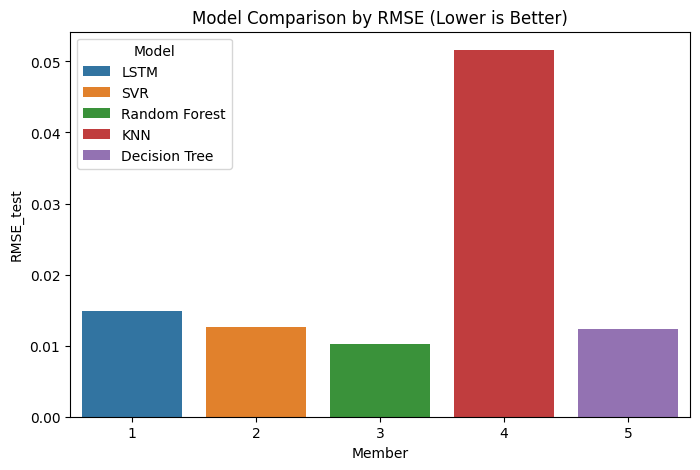

In [ ]:
# Sort by best R²
df_sorted = df.sort_values('R2_test', ascending=False)
display(df_sorted)

# Plot comparison
plt.figure(figsize=(8,5))
sns.barplot(x='Member', y='R2_test', hue='Model', data=df)
plt.title('Model Comparison by R² (Higher is Better)')
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='Member', y='RMSE_test', hue='Model', data=df)
plt.title('Model Comparison by RMSE (Lower is Better)')
plt.show()


In [ ]:
best_model = df_sorted.iloc[0]
print("Best Performing Model:")
print(best_model)


Best Performing Model:
Member                           3
Model                Random Forest
RMSE_test                 0.010209
MAE_test                  0.005457
R2_test                   0.998542
Training_Time_sec        30.410619
Name: 2, dtype: object


In [ ]:
#==========================================================
#=====================Challenges===========================
#==========================================================

#1).Large dataset size (≈ 2 million records): Training some models (e.g., LSTM, SVR, Random Forest) required careful sampling
# and tuning to manage memory and computation limits in Google Colab.

#2).Time-based data: Since this is time-series data, standard cross-validation could not be used — instead, TimeSeriesSplit was applied to preserve temporal order.

#3).Hyperparameter tuning: RandomizedSearchCV was used for tuning, but it was computationally expensive for complex models.

#4).Balancing accuracy vs. efficiency: While LSTM and Random Forest gave higher accuracy, they required longer training times compared to simple models like Decision Tree or KNN.

In [ ]:
#==========================================================
#=====================Performance==========================
#==========================================================

#Random Forest :Highest R² (0.9985), lowest RMSE (0.0102) - Best balance of accuracy and generalization

#Decision Tree :R² ≈ 0.9979, RMSE ≈ 0.0123 - Fast and interpretable; good baseline

#SVR : R² ≈ 0.9977, RMSE ≈ 0.0127 - Strong performance with proper scaling

#LSTM : R² ≈ 0.9969 - Captures temporal patterns but slower to train

#KNN : R² ≈ 0.9627 - Simplest but least accurate; poor scalability

In [ ]:
#==========================================================
#==============expected behavior===========================
#==========================================================

#Tree-based models (Random Forest, Decision Tree): Expected to perform strongly on large structured data, handling non-linear relationships and feature interactions well.

#SVR: Performs well when data is scaled, expected to deliver smooth regression curves but slower on large datasets.

#LSTM: Designed for sequential data — expected to capture temporal dependencies but more resource-heavy.

#KNN: Expected to degrade with large datasets since it stores all data points and requires distance computation for each prediction.